In [2]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
lr = 0.1
real_params = [1.2, 2.5]   # 真正的参数

tf.disable_v2_behavior()
tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])
weight = tf.Variable(initial_value=[[5]], dtype=tf.float32)
bia = tf.Variable(initial_value=[[4]], dtype=tf.float32)
y = tf.matmul(tf_X, weight) + bia
 
loss = tf.losses.mean_squared_error(tf_y, y)
train_op = tf.train.GradientDescentOptimizer(lr).minimize(loss)
 
X_data = np.linspace(-1, 1, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.1, X_data.shape)
y_data = X_data * real_params[0] + real_params[1] + noise
 
sess = tf.Session()
sess.run(tf.global_variables_initializer())
 
weights = []
biases = []
losses = []
for step in range(400):
    w, b, cost, _ = sess.run([weight, bia, loss, train_op],
                             feed_dict={tf_X: X_data, tf_y: y_data})
    weights.append(w)
    biases.append(b)
    losses.append(cost)
result = sess.run(y, feed_dict={tf_X: X_data, tf_y: y_data})
 
plt.figure(1)
plt.scatter(X_data, y_data, color='r', alpha=0.5)
plt.plot(X_data, result, lw=3)
 
fig = plt.figure(2)
ax_3d = Axes3D(fig)
w_3d, b_3d = np.meshgrid(np.linspace(-2, 7, 30), np.linspace(-2, 7, 30))
loss_3d = np.array(
    [np.mean(np.square((X_data * w_ + b_) - y_data))
     for w_, b_ in zip(w_3d.ravel(), b_3d.ravel())]).reshape(w_3d.shape)
ax_3d.plot_surface(w_3d, b_3d, loss_3d, cmap=plt.get_cmap('rainbow'))
weights = np.array(weights).ravel()
biases = np.array(biases).ravel()
 
# 描绘初始点
ax_3d.scatter(weights[0], biases[0], losses[0], s=30, color='r')
ax_3d.set_xlabel('w')
ax_3d.set_ylabel('b')
ax_3d.plot(weights, biases, losses, lw=3, c='r')


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "d:\program files (x86)\python\python36\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 18, in swig_import_helper
    fp, pathname, description = imp.find_module('_pywrap_tensorflow_internal', [dirname(__file__)])
  File "d:\program files (x86)\python\python36\lib\imp.py", line 297, in find_module
    raise ImportError(_ERR_MSG.format(name), name=name)
ImportError: No module named '_pywrap_tensorflow_internal'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "d:\program files (x86)\python\python36\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "d:\program files (x86)\python\python36\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "d:\program

TypeError: must be str, not list

0.089197226


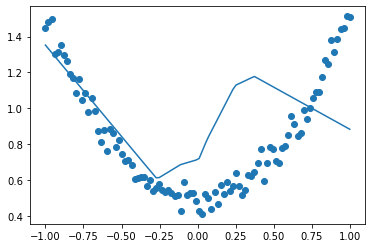

0.011202997
0.00800809
0.00740563
0.006936029
0.006622545
0.006375675


In [12]:
 def add_layer(input, in_size, out_size, activation_function=None):
    Weight = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]))
    y = tf.matmul(input, Weight) + biases
    if activation_function is None:
        return y
    else:
        return activation_function(y)
 
 
X_data = np.linspace(-1, 1, 100, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, (X_data.shape[0], 1))
# 使得产生的数据在x^2+0.5曲线上下
y_data = np.square(X_data) + 0.5 + noise
 
X = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])
 
# 通过add_layer指定了该层框架，之后在迭代过程中不再调用函数
# 输入层为1个神经元，隐藏层为10个神经元，输出层为1个神经元
hidden_layer = add_layer(X, 1, 10, activation_function=tf.nn.relu)
output_layer = add_layer(hidden_layer, 10, 1, activation_function=None)
 
loss = tf.reduce_mean(tf.square(y - output_layer))
trainer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
 
fig, ax = plt.subplots(1, 1)
ax.scatter(X_data, y_data)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(301):
        sess.run(trainer, feed_dict={X: X_data, y: y_data})
        if _ % 50 == 0:
            print(sess.run(loss, feed_dict={X: X_data, y: y_data}))
            curve = ax.plot(X_data, sess.run(output_layer, feed_dict={X: X_data, y: y_data}))
            plt.pause(0.5)  # 停留0.5s
            if _ != 300:
                ax.lines.remove(curve[0])  # 抹除ax上的线，必须以列表下标的形式
 
 
plt.show()


a= 1.2139248 b= 2.5145464


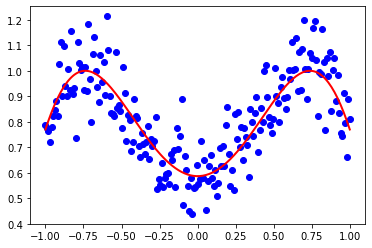

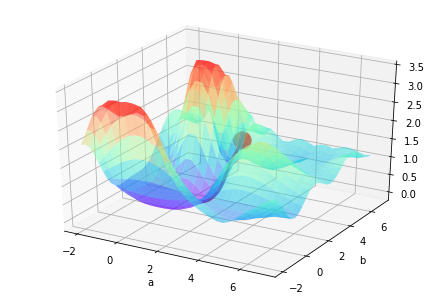

In [15]:
LR = 0.1
REAL_PARAMS = [1.2, 2.5]
INIT_PARAMS = [[5, 4],
               [5, 1],
               [2, 4.5]][2]
 
x = np.linspace(-1, 1, 200, dtype=np.float32)   # x data
 
y_fun = lambda a, b: np.sin(b*np.cos(a*x))
tf_y_fun = lambda a, b: tf.sin(b*tf.cos(a*x))
 
noise = np.random.randn(200)/10
y = y_fun(*REAL_PARAMS) + noise         # target
 
# tensorflow graph
a, b = [tf.Variable(initial_value=p, dtype=tf.float32) for p in INIT_PARAMS]
pred = tf_y_fun(a, b)
mse = tf.reduce_mean(tf.square(y-pred))
train_op = tf.train.GradientDescentOptimizer(LR).minimize(mse)
 
a_list, b_list, cost_list = [], [], []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for t in range(400):
        a_, b_, mse_ = sess.run([a, b, mse])
        a_list.append(a_); b_list.append(b_); cost_list.append(mse_)    # record parameter changes
        result, _ = sess.run([pred, train_op])                          # training
 
 
# visualization codes:
print('a=', a_, 'b=', b_)
plt.figure(1)
plt.scatter(x, y, c='b')    # plot data
plt.plot(x, result, 'r-', lw=2)   # plot line fitting
# 3D cost figure
fig = plt.figure(2); ax = Axes3D(fig)
a3D, b3D = np.meshgrid(np.linspace(-2, 7, 30), np.linspace(-2, 7, 30))  # parameter space
cost3D = np.array([np.mean(np.square(y_fun(a_, b_) - y)) for a_, b_ in zip(a3D.flatten(), b3D.flatten())]).reshape(a3D.shape)
ax.plot_surface(a3D, b3D, cost3D, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'), alpha=0.5)
ax.scatter(a_list[0], b_list[0], zs=cost_list[0], s=300, c='r')  # initial parameter place
ax.set_xlabel('a'); ax.set_ylabel('b')
ax.plot(a_list, b_list, zs=cost_list, zdir='z', c='r', lw=3)    # plot 3D gradient descent
plt.show()